# Pronóstico de ocupación de casillas a marzo 2021
## Emilio Villa Cueva
Se usaron datos del INE 

In [1]:
#importa librerías a usar
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:
#Toma únicamente sección de guanajuato y columna de interés (lista_nacional)
direct = 'datosabiertosINE/'
filenames = ['00_mar19.txt','01_abr19.txt','02_may19.txt',
             '03_jun19.txt','04_jul19.txt','05_ago19.txt','1_sep19.txt',
             '2_oct19.txt','3_nov19.txt','4_dic19.txt',
             '5_ene20.txt','6_feb20.txt','7_mar20.txt','8_abr20.txt','9_may20.txt',
             '10_jun20.txt','11_jul20.txt','12_ago20.txt','13_sep20.txt','14_oct20.txt',
             '15_nov20.txt','16_dic20.txt']
short_fnames = [fn[-9:-4] for fn in filenames]

ls = ['LISTA_NAL','LISTA_NACIONAL','LISTA']

dfs = []
for file in filenames:
    tmp_df = (pd.read_csv(direct+file))
    for nm in ls:
        if nm in tmp_df.columns:
            tmp_df.rename(columns={nm:'LISTA_N'}, inplace=True)
    dfs.append(tmp_df)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#asigna nombre de periodo
for i in range(len(filenames)):
    #print(filenames[i][-9:-4])
    dfs[i].insert(0,'Periodo',filenames[i][-9:-4])
    
#junta todo en un dataframe y toma únicamente los valores de  interés
df = pd.concat(dfs)
df_gto = df.loc[df['ENTIDAD'] == int(11)]
df_gto=df_gto[['Periodo','SECCION','MUNICIPIO','LISTA_N']]
df_gto.head()

,Periodo,SECCION,MUNICIPIO,LISTA_N
17840,mar19,0.0,0.0,25173.0
17841,mar19,331.0,6.0,683.0
17842,mar19,332.0,6.0,762.0
17843,mar19,333.0,6.0,1055.0
17844,mar19,334.0,6.0,652.0


In [4]:
#calcula tasa de cambio por municipio usando regresion lineal
N_mps=46
rocs=[] #rate of change
for mun in range(0,N_mps+1):
    tmp=df_gto[df_gto['MUNICIPIO']==mun]
    tmp=tmp.groupby(['Periodo']).sum()
    tmp = tmp.reindex(short_fnames)
    aux = np.asarray(tmp['LISTA_N'])
    tst=np.swapaxes(np.array([np.linspace(1,22,22)]),0,1)
    linReg = LinearRegression().fit(tst,aux)
    pred=linReg.predict(np.array([[24]]))
    roc = pred[0]/aux[-1]
    rocs.append(roc)

<ipython-input-4-c521f281196b>:12: RuntimeWarning: divide by zero encountered in double_scalars
  roc = pred[0]/aux[-1]


Text(0.5, 1.0, 'Crecimiento lista nominal municipio 8')

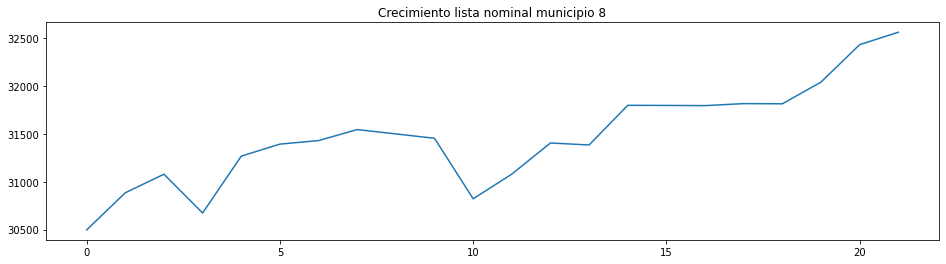

In [5]:
#Para graficar municipios específicos
M=8
plt.figure(figsize=(16,4))
tmp=df_gto[df_gto['MUNICIPIO']==M]
tmp=tmp.groupby(['Periodo']).sum()
tmp = tmp.reindex(short_fnames)
aux = np.asarray(tmp['LISTA_N'])
plt.plot(aux)
plt.title('Crecimiento lista nominal municipio '+str(M))

In [6]:
#Ahora se hace el pronóstio por sección
df_tmp = df_gto.loc[df_gto['Periodo'] ==  'dic20']
df_tmp=df_tmp.groupby(['SECCION']).sum()
arr_LN=np.asarray(df_tmp['LISTA_N'])
arr_M=np.asarray(df_tmp['MUNICIPIO'])
forecast=[]
#guarda tasas de cambio pronosticadas en forecast
for s in range(1,len(arr_LN)):
    forecast.append(arr_LN[s]*rocs[int(arr_M[s])])


In [7]:
#Calcula numero de casillas necesarias
#
totCas=0
for fc in forecast:
    totCas+= np.ceil(fc/750.0)
print('El número total de casillas requerido es {}'.format(int(totCas)))

El número total de casillas requerido es 7620
